In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy.optimize import curve_fit
from scipy.ndimage.measurements import center_of_mass as cm
from numpy.linalg import norm as nm
import menzalib as mz

In [3]:
x=[[17,2007],[34,1941],[49,1998],[49,1850]]
y=[[700,700],[580,580],[500,500],[300,300]]

for i in range(len(x)):
    img=mpimg.imread('immagini/righello/QS_251'+str(i)+'.jpg')
    plt.axis('off')
    plt.imshow(img[:,:,0])
    plt.plot(x[i],y[i],color='red')
    plt.savefig('immagini/python/righello'+str(i)+'.png',dpi=500)
    plt.close()

In [3]:
num_tacchette=np.array([45,18,10,5])
micron=num_tacchette*100
Lmax,Lmin=np.array([2005,1935,1994,1863]),np.array([1990,1892,1907,1753])
L,dL=(Lmax+Lmin)/2,(Lmax-Lmin)/2
mpp,dmpp=np.empty(len(micron)),np.empty(len(micron))#micron per pixel
for i in range(len(L)): 
    mpp[i]=micron[i]/L[i]
    dmpp[i]=mz.drapp(1,0,L[i],dL[i])

In [31]:
zoom=np.array([[0,0,1,1,3,3],
               [1,1,2,2,3,3],
               [0,0,1,1,2,2],
               [0,0,1,1,3,3],
               [0,0,1,1,2,2]])
Lmax=np.array([[638,767,803,1894,540,921],
               [1162,1224,519,423,201,193],
               [678,685,1040,1041,670,677],
               [636,772,786,1892,520,917],
               [685,704,1043,1081,690,693]])
Lmin=np.array([[613,747,772,1865,507,863],
               [1146,1205,484,394,156,155],
               [654,669,1027,1023,644,631],
               [624,755,770,1878,470,680],
                [669,687,1029,1062,652,642]])

def tabella(zoom,Lmax,Lmin):
    ingrandimento=['4x','10x','20x','40x']
    orientamento=[', verticale',', orizzontale']
    L,dL=(Lmax+Lmin)/2,(Lmax-Lmin)/2
    lung,dlung=np.empty(len(zoom)),np.empty(len(zoom))
    col1=[]
    for i in range(len(zoom)):
        lung[i]=L[i]*mpp[zoom[i]]
        dlung[i]=L[i]*dmpp[zoom[i]]+dL[i]*mpp[zoom[i]]
        col1.append(ingrandimento[zoom[i]]+orientamento[i%2])
    M=[col1,mz.ns_tex(Lmax),mz.ns_tex(Lmin),mz.ne_tex(L,dL),mz.ne_tex(lung,dlung)]
    mz.mat_tex(M)
    print(L[3],dL[3],mz.ne_tex(L[3],dL[3]))

    
tabella(zoom[4],Lmax[4],Lmin[4])
#tabella(zoom[3],Lmax[3],Lmin[3])



Copia tutto quello che c'è tra le linee

--------------------------
\begin{tabular}{ccccc}
	\hline
	% Qua mettici il titolo, ricordati di mettere le \\ alla fine % 
	\hline
	4x, verticale & $6.85 \times 10^{2}$ & $6.69 \times 10^{2}$ & $(6.77 \pm 0.08) \times 10^{2}$ & $(1.53 \pm 0.02) \times 10^{3}$ \\
	4x, orizzontale & $7.04 \times 10^{2}$ & $6.87 \times 10^{2}$ & $(6.96 \pm 0.08) \times 10^{2}$ & $(1.57 \pm 0.02) \times 10^{3}$ \\
	10x, verticale & $1.04 \times 10^{3}$ & $1.03 \times 10^{3}$ & $(1.036 \pm 0.007) \times 10^{3}$ & $(9.75 \pm 0.07) \times 10^{2}$ \\
	10x, orizzontale & $1.08 \times 10^{3}$ & $1.06 \times 10^{3}$ & $(1.072 \pm 0.010) \times 10^{3}$ & $(1.008 \pm 0.009) \times 10^{3}$ \\
	20x, verticale & $6.90 \times 10^{2}$ & $6.52 \times 10^{2}$ & $(6.7 \pm 0.2) \times 10^{2}$ & $(3.44 \pm 0.10) \times 10^{2}$ \\
	20x, orizzontale & $6.93 \times 10^{2}$ & $6.42 \times 10^{2}$ & $(6.7 \pm 0.3) \times 10^{2}$ & $(3.4 \pm 0.1) \times 10^{2}$ \\
	\hline
\end{tabular}



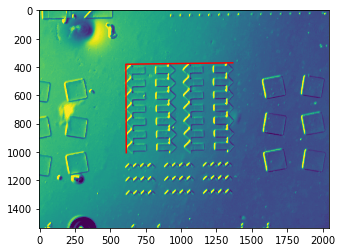

[1413.33286423 1707.43618099]


In [5]:
freccie=['4x/QS_2514.jpg','10x/QS_2519.jpg','40x/QS_2528.jpg']
img=mpimg.imread('immagini/1/'+freccie[0])
#plt.axis('off')
plt.imshow(img[:,:,0])
x,y=[613,610,1365],[1005,380,370]
plt.plot(x,y,color='red')
plt.savefig('immagini/python/quadrato_freccie.png',dpi=500)
plt.show()
dim=np.empty(len(x)-1)
for i in range(len(x)-1):
    dim[i]=mpp[0]*np.sqrt((x[i]-x[i+1])**2+(y[i]-y[i+1])**2)
print(dim)

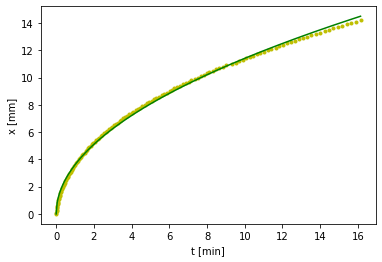

$3.60781 \pm 0.00004$


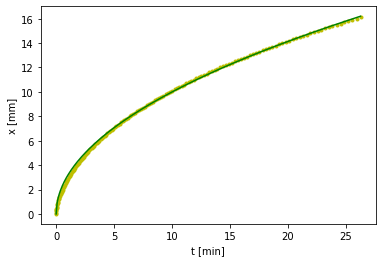

$3.15953 \pm 0.00002$


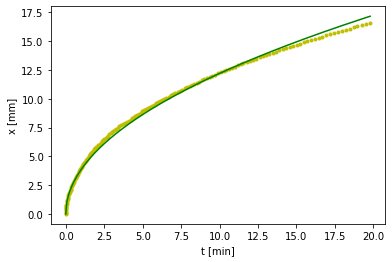

$3.85956 \pm 0.00006$


In [24]:
plt.close()
popt=[]
pcov=[]
def rad0(x,a,x_0,y_0):
    return np.sqrt(np.abs(x-x_0))*a+y_0
def rad(x,a):
    return np.sqrt(x)*a

for i in range(3):
    with open('cronometro_canale/'+str(i)+'.txt') as file:
        t=[]
        for line in file:
            tratto1=line.find(' - ')
            tratto2=line.find(' - ',tratto1+1)
            line=line.replace(',','.')
            t.append(float(line[tratto1+3:tratto2]))
    t=(np.array(t)-t[0])/60
    n=np.arange(len(t))/10
    plt.plot(t,n,'y.')
    plt.xlabel('t [min]')
    plt.ylabel('x [mm]')
    #popt0,pcov0=curve_fit(rad,t,n,p0=[4.18,-0.4,-2.9])
    popt0,pcov0=curve_fit(rad,t,n,p0=4.18)
    popt.append(popt0)
    pcov.append(pcov0)
    x=np.linspace(0,t[-1],300)
    plt.plot(x,rad(x,*popt0),'g-')    
    plt.savefig('immagini/python/fit/'+str(i)+'.eps',format='eps')
    plt.show()
    plt.close()
    print(mz.ne_tex(popt0,pcov0)[0][0])

In [59]:
def differenza_due_fotogrammi(file1,file2):
    img1=mpimg.imread(file1)[:,:,0].astype(np.int)
    img2=mpimg.imread(file2)[:,:,0].astype(np.int)
    diff=np.empty([len(img1),len(img1[0])])
    diff=(img1-img2)**2
    diff=diff*255/np.amax(diff)
    diff=diff.astype(np.uint8)
    return diff

#funzione che considera i fotogrammi tagliati per questa esperienza
def df_temp(file1,file2):
    img1=mpimg.imread(file1)[:,:,0][450:600,520:1340].astype(np.int)
    img2=mpimg.imread(file2)[:,:,0][450:600,520:1340].astype(np.int)
    diff=np.empty([len(img1),len(img1[0])])
    diff=(img1-img2)**2
    diff=diff*255/np.amax(diff)
    diff[diff<70]=0
    diff=diff.astype(np.uint8)
    return diff

In [ ]:
i=600
di=2+int(i/60)
img1=mpimg.imread('immagini/fotogrammi/'+str(i)+'.jpg')[:,:,0][450:600,520:1340]
img2=mpimg.imread('immagini/fotogrammi/'+str(i+di)+'.jpg')[:,:,0][450:600,520:1340]
np.save('immagini/differenze_np/'+str(i)+'.npy',img)

# Non eseguire questa cella di codice
il calcolo è lungo e serve a creare i le differenze dei fotogrammi

In [60]:
plt.close()
n,dn=200,8
l=1823
for i in range(l):
    di=2+int(i/60)
    img=df_temp('immagini/fotogrammi/'+str(i)+'.jpg','immagini/fotogrammi/'+str(i+di)+'.jpg')
    np.save('immagini/differenze_np/'+str(i)+'.npy',img)

FileNotFoundError: [Errno 2] No such file or directory: 'immagini/fotogrammi/1825.jpg'

# Non eseguire nemmeno questa

In [195]:
centrom=[]
for num in range(l):
    img=np.load('immagini/differenze_np/'+str(num)+'.npy')
    cem=cm(img)
    for i in (range(len(img))):
        for j in range(len(img[0])):
            if ((cem[0]-i)**2+(j-cem[1])**2)>150**2:
                img[i][j]=0
    centrom.append(cm(img))
    print(num,end='\r')

FileNotFoundError: [Errno 2] No such file or directory: 'immagini/differenze_np/1794.npy'

In [203]:
centrom=np.array(centrom)
for i in range (len(centrom)-2):
    dist=10
    if nm(centrom[i]-centrom[i+1])>dist and nm(centrom[i+1]-centrom[i+2])>dist and nm(centrom[i]-centrom[i+2])<dist:
        centrom[i+1]=(centrom[i]+centrom[i+2])/2
        print(i)
#np.save('centro_di_massa/cm',centrom)

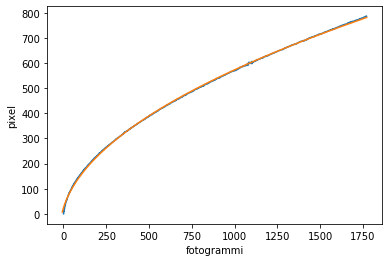

[ 20.05722807 -21.06472354 -67.82121684]


In [38]:
centrom=np.load('centro_di_massa/cm.npy')
centrom=centrom[6:]
centrom=centrom-centrom[0]
centrom[24]=centrom[23]*2/3+centrom[26]*1/3
centrom[25]=centrom[23]*1/3+centrom[26]*2/3
versore=-(centrom[50]-centrom[-400])/nm(centrom[50]-centrom[-400])
x=np.empty(len(centrom))
for i in range(len(x)):
    x[i]=np.dot(versore,centrom[i])
    if i<100 and x[i]>170: print(i)
x=x[:np.where(x==np.amax(x))[0][0]]
centrom=centrom[:np.where(x==np.amax(x))[0][0]]
plt.plot(np.arange(len(x)),x)
plt.xlabel('fotogrammi')
plt.ylabel('pixel')
np.save('centro_di_massa/centro_di_massa_definitivo',centrom)
np.save('posizione',x)
popt,pcov=curve_fit(rad,np.arange(len(x)),x,p0=[18.5,-0.1,-0.1],maxfev=10000)
x=np.linspace(-7,len(x),500)
plt.plot(x,rad(x,*popt))
plt.savefig('fit_video.eps',format='eps')
plt.savefig('fit_video.png')
plt.show()
print(popt)